<a href="https://colab.research.google.com/github/Sowmya-2348562/ML-lab/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Tools and Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Importing Models of sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Import Evaluation Libraries
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
# from sklearn.metrics import plot_roc_curve  #(not working)
# from sklearn.metrics import plot_roc_curve #(working)
from sklearn.metrics import roc_curve, auc # (by chatgpt)

**Exploring the Data Initial Stage**

In [5]:
df = pd.read_csv('/content/heart.csv')
df.shape

(1025, 14)

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [9]:
value_counts=df['target'].value_counts()
value_counts

1    526
0    499
Name: target, dtype: int64

([<matplotlib.axis.XTick at 0x7f1ec1a3f310>,
 [Text(1, 0, 'No Heart Disease (0)'), Text(0, 0, 'Heart Disease (1)')])

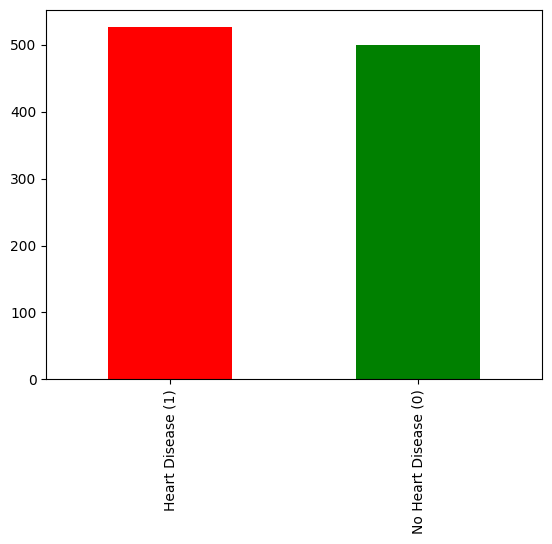

In [10]:
df['target'].value_counts().plot(kind='bar', color=['red','green']);
plt.xticks(value_counts.index, ['No Heart Disease (0)', 'Heart Disease (1)'])

In [11]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
# Checking Statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [14]:
len(df)

1025

In [15]:
207/303

0.6831683168316832

In [16]:
97/303

0.3201320132013201

In [17]:
# checking how many male and female have disease
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,86,413
1,226,300


In [18]:
# Male patient in percent
72/96

0.75

In [19]:
# Female patient in percent
93/207

0.4492753623188406

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

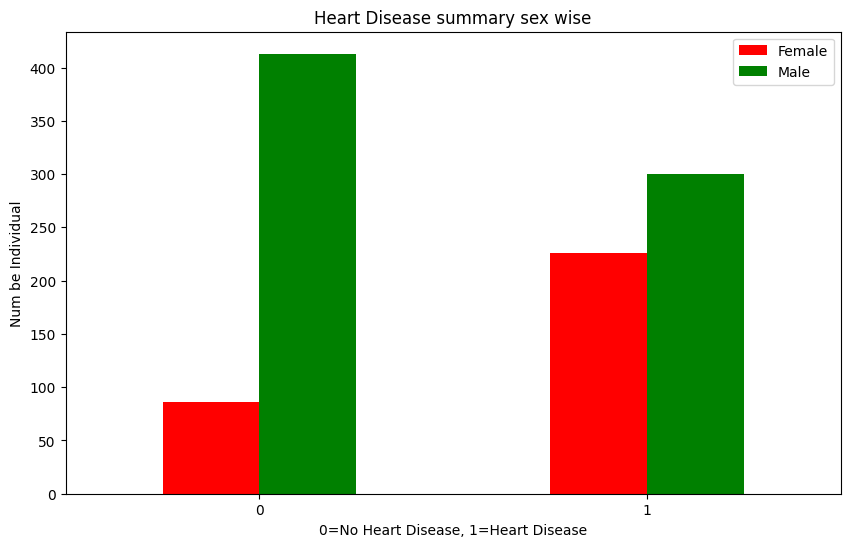

In [20]:
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['red','green'])
plt.title('Heart Disease summary sex wise')
plt.xlabel('0=No Heart Disease, 1=Heart Disease')
plt.ylabel('Num be Individual')
plt.legend(['Female','Male'])
plt.xticks(rotation=0) #;

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90]),
 [Text(0, 0, '71'),
  Text(1, 0, '88'),
  Text(2, 0, '90'),
  Text(3, 0, '95'),
  Text(4, 0, '96'),
  Text(5, 0, '97'),
  Text(6, 0, '99'),
  Text(7, 0, '103'),
  Text(8, 0, '105'),
  Text(9, 0, '106'),
  Text(10, 0, '108'),
  Text(11, 0, '109'),
  Text(12, 0, '111'),
  Text(13, 0, '112'),
  Text(14, 0, '113'),
  Text(15, 0, '114'),
  Text(16, 0, '115'),
  Text(17, 0, '116'),
  Text(18, 0, '117'),
  Text(19, 0, '118'),
  Text(20, 0, '120'),
  Text(21, 0, '121'),
  Text(22, 0, '122'),
  Text(23, 0, '123'),
  Text(24, 0, '124'),
  Text(25, 0, '125'),
  Text(26, 0, '126'),
  Text(27

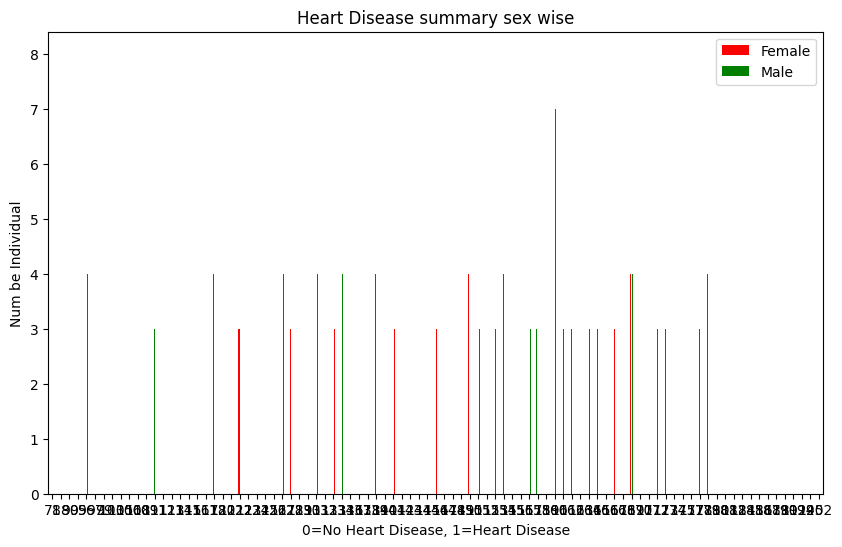

In [21]:
# thalach = maximum heart rate
# Finding patterns in Data using Scatter Plot
pd.crosstab(df.thalach,df.age).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['red','green'])
plt.title('Heart Disease summary sex wise')
plt.xlabel('0=No Heart Disease, 1=Heart Disease')
plt.ylabel('Num be Individual')
plt.legend(['Female','Male'])
plt.xticks(rotation=0) #;

In [22]:
df.thalach.value_counts()


162    35
160    31
163    29
173    28
152    28
       ..
194     3
185     3
106     3
88      3
113     3
Name: thalach, Length: 91, dtype: int64

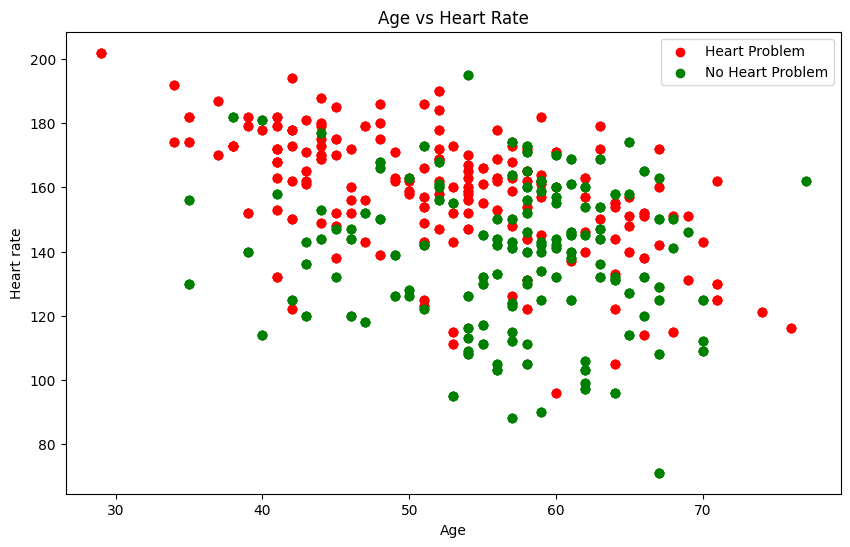

In [23]:
# Finding Patterns in Data Using Scatter Plot
plt.figure(figsize=(10,6))
# Create scatter plot
# plt.scatter(df.age,df.thalach,c='green'); # for total data
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='red'); # for those who have heart disease
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='green'); # for those who have not heart disease
# doing makeup hahahahahah
plt.title('Age vs Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart rate')
plt.legend(['Heart Problem','No Heart Problem']);

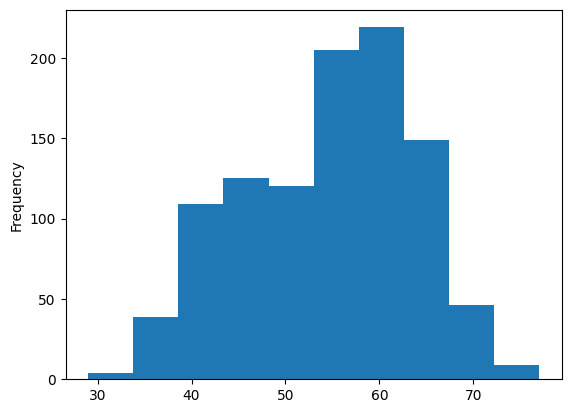

In [24]:
# histogram plot from guasian distribution collect random sample
# result is down from perfect guasion distribution i.e Skeed
# histogram not only tell how much you deviate from perfect guasius distribution but all tell how many outliers presents

# Create histogram to see age Distribution
df.age.plot.hist();

In [25]:
df.cp.value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

In [26]:
# cross always between two tab(columns)
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


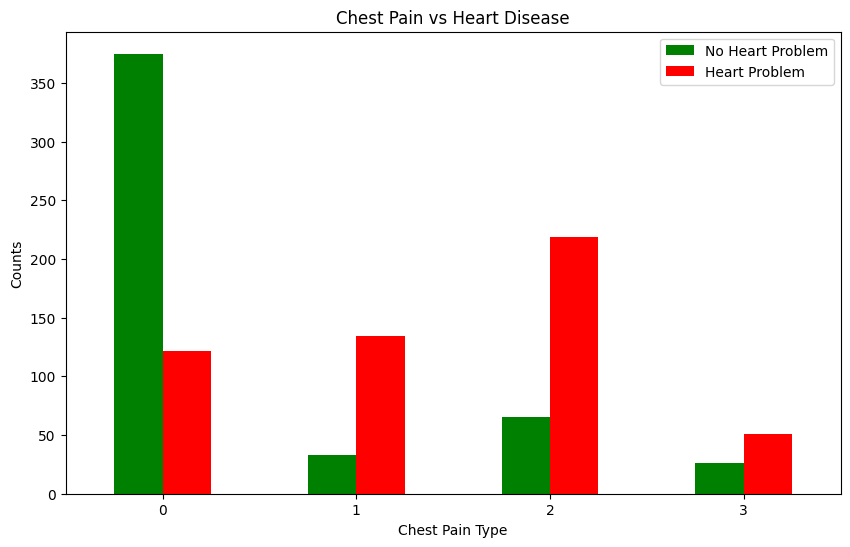

In [27]:
# Making the bar chat of chest pain vs target
pd.crosstab(df.cp,df.target).plot(kind='bar',
                              figsize=(10,6),
                              color=['green','red'])
# Make some discription of the chart
plt.title('Chest Pain vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Counts')
plt.legend(['No Heart Problem','Heart Problem']);
plt.xticks(rotation=0);

In [ ]:
# ya sara matrix ka apes correlation dikhta hay
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.corr()
# Diagnel value : always one, one correlation with itself
# Maximum correlation : khud kay sath ko relation
# Positive correlation : one value increase and other also increase
# Negative correlation : one value increase and other decrease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


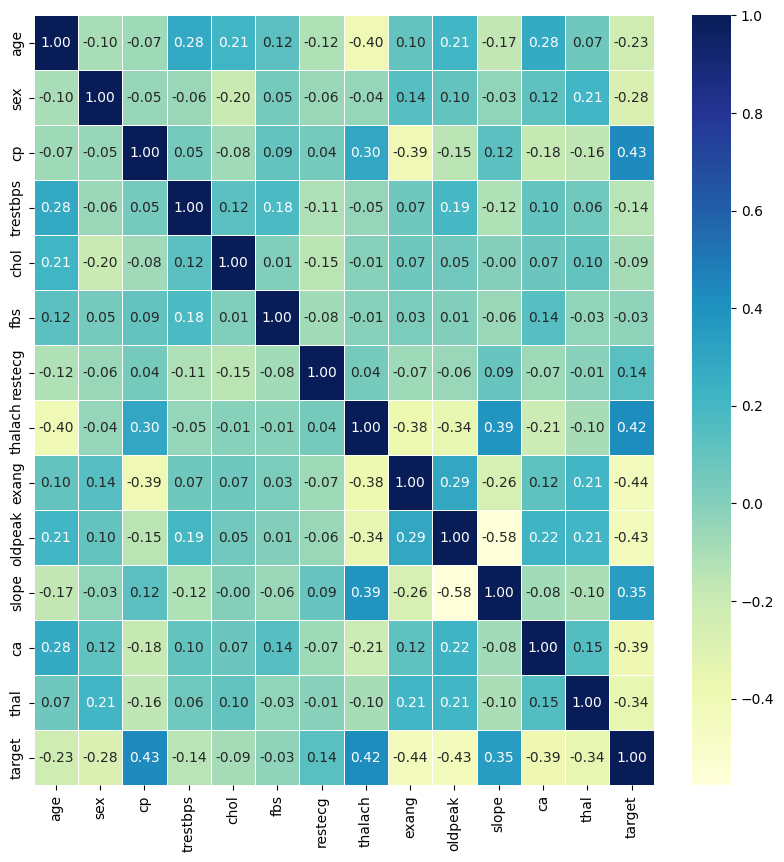

In [ ]:
# Lets Draw Corelation Map
cor_map = df.corr()
home,room = plt.subplots(figsize=(10,10))
room = sns.heatmap(cor_map,
                  annot=True,
                  linewidths=0.5,
                  fmt='0.2f',
                  cmap='YlGnBu'); # fmt: value after point two

In [ ]:
# 210.14 : Modelling split the data
# df.head()
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
# Split into test and train data
# axis=1 : means drop entire column
x = df.drop('target', axis=1)
y = df['target']

In [ ]:
# see value of x
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
# see value of y
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
# using Random seed, so that others could produce the same result
np.random.seed(7)
# Split into test and train

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
len(x)

303

In [ ]:
len(x_train)

242

In [ ]:
242/303

0.7986798679867987

In [ ]:
# Putting the value into a dictionary
models = {'KNN':KNeighborsClassifier(),
         'Random Forest':RandomForestClassifier(),
         'Logistic Regression':LogisticRegression()}
# def : is function
# fit_and_score : is model
# Random seed : for result reproduceble
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(7)
    # Make a dictionary to score the model
    model_score = {}
    # Looping through
    for name,model in models.items():
        model.fit(x_train,y_train)
        # Evaluate the model and append it score
        model_score[name] = model.score(x_test,y_test)
    return model_score

In [ ]:
model_scores = fit_and_score(models=models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.5573770491803278,
 'Random Forest': 0.7213114754098361,
 'Logistic Regression': 0.7377049180327869}

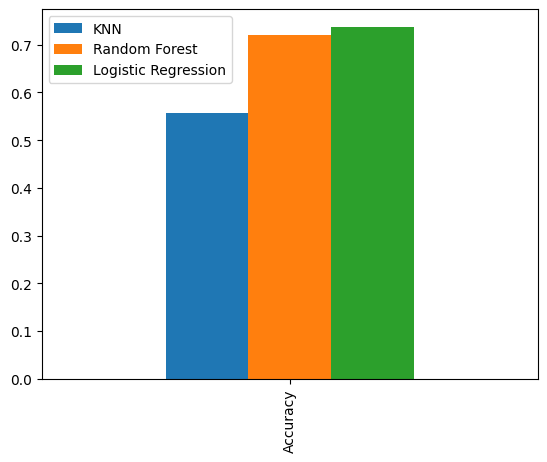

In [ ]:
# is ko bhter tarikay se represent kr saktay
model_compare = pd.DataFrame(model_scores,index=['Accuracy'])
model_compare.plot.bar();

In [ ]:
KNN = KNeighborsClassifier()
KNN.set_params()

KNeighborsClassifier()

In [ ]:
# below is function for a whole range hyperparameters ko test krata hay score 1 list k ander append krwa k deta hay or score test hota hay 1 to 30


# score k leyee empty matrix
train_score = []
test_score = []
# Create range to be test for n_neighbors
nneighbors = range(1,30)
# KNN Instance
KNN = KNeighborsClassifier()
# Set Parameter : ksi model k hyperparameter set krnay hotay hay na to ap kay pass jo command hoti hay
# Looping through the range
for i in nneighbors:
    KNN.set_params(n_neighbors=i)
    # Run the fit for the value
    KNN.fit(x_train,y_train)
    # Update the training score
    train_score.append(KNN.score(x_train,y_train))
    # Update the test score list
    test_score.append(KNN.score(x_test,y_test))

In [ ]:
train_score

[1.0,
 0.8099173553719008,
 0.7768595041322314,
 0.756198347107438,
 0.7603305785123967,
 0.731404958677686,
 0.743801652892562,
 0.7148760330578512,
 0.71900826446281,
 0.731404958677686,
 0.7272727272727273,
 0.7231404958677686,
 0.731404958677686,
 0.71900826446281,
 0.7148760330578512,
 0.6900826446280992,
 0.7272727272727273,
 0.71900826446281,
 0.7107438016528925,
 0.7066115702479339,
 0.7024793388429752,
 0.7024793388429752,
 0.7107438016528925,
 0.6900826446280992,
 0.7107438016528925,
 0.7066115702479339,
 0.7107438016528925,
 0.7066115702479339,
 0.7066115702479339]

In [ ]:
test_score

[0.6065573770491803,
 0.6557377049180327,
 0.6229508196721312,
 0.6229508196721312,
 0.5573770491803278,
 0.639344262295082,
 0.6721311475409836,
 0.6557377049180327,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853,
 0.6557377049180327]

Max KNN Score:70.49%


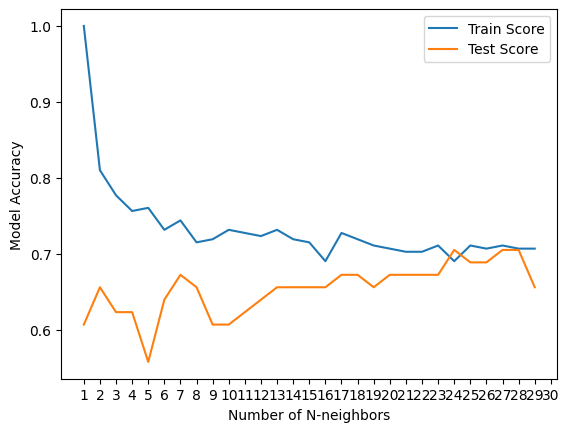

In [ ]:
plt.plot(nneighbors,train_score, label='Train Score')
plt.plot(nneighbors,test_score, label='Test Score')
plt.xticks(np.arange(1,31,1))
# Static beauty
plt.xlabel('Number of N-neighbors')
plt.ylabel('Model Accuracy')
plt.legend();
print(f'Max KNN Score:{max(test_score)*100:0.2f}%')

In [ ]:
# making the dictionary with and value
# log basically is power of 10
# log is used for capturing small variation
# log is inverse of exponent

# hum nay log redhemic regression pay hyperparameter ka aik dictionary bna li

LR_hp = {
    'C': np.logspace(-4,4,20),
    'solver': ['liblinear']
}


In [ ]:
# Just Google it :
# What are the best hyperparameter
# how to tune hyperpaprameter

LR_hp = {
    'C': np.logspace(-4,4,20),
    'solver': ['liblinear']
}
RFC_hp = {
    'n_estimators':np.arange(10,1600,100),
    'max_depth':[None,3,5,6,10],
    'min_samples_split':np.arange(2,20,2),
    'min_samples_leaf':np.arange(1,20,2)
}

In [ ]:
# tune Logistic Regression
np.random.seed(7)
# Lets use RSCV to tune HP

# ya instant create kya hay Regression model ka (LogisticRegression)
# hyperparameters hay jo hum tune krna chtay hay(param_distibution)
# CV=5 : meray data ki 5 copies bna lo (or har copy kay ander say jo ap nay data test kay leyee lena hay us ko select krna hay mean har 5 copies may say 20 percent select kray ga)

lr = RandomizedSearchCV(LogisticRegression(),
                       param_distributions=LR_hp,
                       cv=5,
                       n_iter=20,# n_iter = number of combination
                       verbose=True)

# Fit the random HP search model for LR
lr.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
lr.score(x_test,y_test)

0.7540983606557377

In [ ]:
lr.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [ ]:
# Tune Logistics Regression
np.random.seed(7)
# Lets use RSCV to tune HP

rfc = RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions=RFC_hp,
                       cv=5,
                       n_iter=20,# n_iter = number of combination
                       verbose=True)

# Fit the random HP search model for LR
rfc.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 6, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,  110,  210,  310,  410,  510,  610,  710,  810,  910, 1010,
       1110, 1210, 1310, 1410, 1510])},
                   verbose=True)

In [ ]:
rfc.score(x_test,y_test)
# below value after improvement of RandomForestClassifier

0.7049180327868853

In [ ]:
rfc.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 19,
 'max_depth': 6}

In [ ]:
# tune Logistic Regression using GSCV
np.random.seed(7)
# Lets use RSCV to tune HP

lr_gs = GridSearchCV(LogisticRegression(),
                       param_grid=LR_hp,
                       cv=5,
                       verbose=True)

# Fit the random HP search model for LR
lr_gs.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
lr_gs.score(x_test,y_test)

0.7540983606557377

In [ ]:
lr_gs.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [ ]:
# tune Random Forest Classifier using GSCV
np.random.seed(7)
# Lets use RSCV to tune HP
RFC2_hp = {
    'n_estimators':np.arange(1,101,50),
    'max_depth':[None,3,50],
    'min_samples_split':np.arange(2,8,2),
    'min_samples_leaf':np.arange(1,7,2)
}

rfc_gs = GridSearchCV(RandomForestClassifier(n_jobs=1),
                       param_grid=RFC2_hp,
                       cv=5,
                       verbose=True)

# Fit the random HP search model for LR
rfc_gs.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None, 3, 50],
                         'min_samples_leaf': array([1, 3, 5]),
                         'min_samples_split': array([2, 4, 6]),
                         'n_estimators': array([ 1, 51])},
             verbose=True)

In [ ]:
rfc_gs.score(x_test,y_test)

0.7377049180327869

In [ ]:
 rfc_gs.best_params_

{'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 51}

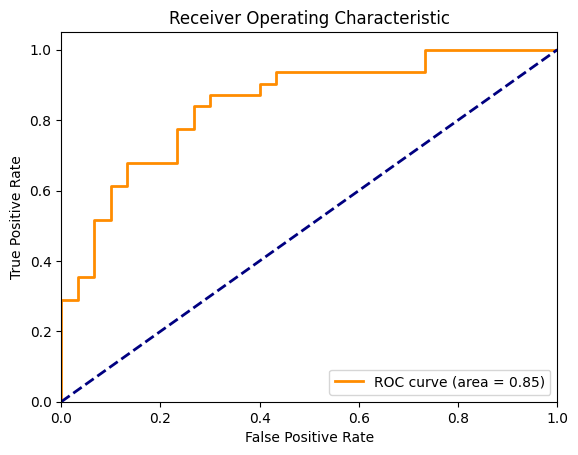

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming lr_gs is your trained logistic regression model
y_scores = lr_gs.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Convert predicted probabilities to binary predictions using a threshold
threshold = 0.5  # Example threshold
y_pred = (y_scores > threshold).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[18 12]
 [ 3 28]]


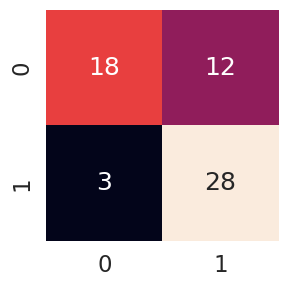

In [ ]:
# Drawing heat map with confusion matrix

sns.set(font_scale=1.5)

def plot_confusion(y_test,y_pred):
    'This plot is the confusion matrix'

    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_pred),
                    annot=True,
                    cbar=False)
plot_confusion(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        30
           1       0.70      0.90      0.79        31

    accuracy                           0.75        61
   macro avg       0.78      0.75      0.75        61
weighted avg       0.78      0.75      0.75        61



In [ ]:
lr_gs.best_params_
# create instance
lr = LogisticRegression(C=0.615848211066026,
                       solver='liblinear')

In [ ]:
# Cross validation Accuracy

cv_accuracy = cross_val_score(lr,
                             x,
                             y,
                             cv=7, # cv=135,it give best result
                             scoring='accuracy')
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.8284506191482934

In [ ]:
# Cross validation precision
# precision value must be less than recall

cv_precision = cross_val_score(lr,
                             x,
                             y,
                             cv=7,
                             scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8108267922553637

In [ ]:
# Cross validation recall

cv_recall = cross_val_score(lr,
                             x,
                             y,
                             cv=7,
                             scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.89648033126294

In [ ]:
# Cross validation f1-score

cv_f1 = cross_val_score(lr,
                             x,
                             y,
                             cv=7,
                             scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8508447334977947

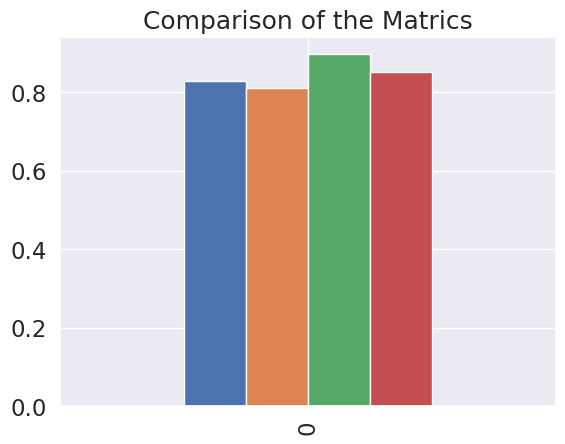

In [ ]:
#1.1 Sir remove it bout I hold it
cv_plot = pd.DataFrame({
    'Accuracy':cv_accuracy,
    'Precision':cv_precision,
    'Recall':cv_recall,
    'f1':cv_f1
},index=[0])
cv_plot.plot.bar(title='Comparison of the Matrics',
                legend=False);

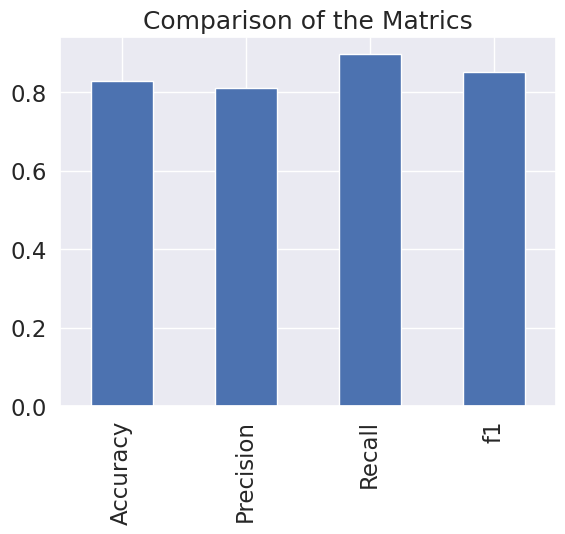

In [ ]:
#1.2
cv_plot = pd.DataFrame({
    'Accuracy':cv_accuracy,
    'Precision':cv_precision,
    'Recall':cv_recall,
    'f1':cv_f1
},index=[0])
cv_plot.T.plot.bar(title='Comparison of the Matrics',
                legend=False);

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# check coffiecient
lr.fit(x_train,y_train)

LogisticRegression(C=0.615848211066026, solver='liblinear')

In [ ]:
# check coffiecient
lr.fit(x_train,y_train)
lr.coef_

array([[ 0.02252678, -1.36972472,  0.79033601, -0.02405914, -0.00188849,
         0.45615731,  0.40549708,  0.03558521, -0.78346587, -0.56674308,
         0.52855363, -0.64573418, -1.10278199]])

In [ ]:
final_coef = dict(zip(df.columns,list(lr.coef_[0])))
final_coef
# positive corelation : is a good sign (are good friend like)
# negative corelation : is a bad sign (are enemy like)

{'age': 0.02252678088859591,
 'sex': -1.3697247235123737,
 'cp': 0.790336009798431,
 'trestbps': -0.024059142708206346,
 'chol': -0.001888490478208966,
 'fbs': 0.45615730903073565,
 'restecg': 0.4054970774699765,
 'thalach': 0.03558520921757022,
 'exang': -0.7834658685604866,
 'oldpeak': -0.5667430774730721,
 'slope': 0.5285536289797753,
 'ca': -0.6457341797406612,
 'thal': -1.1027819922077673}

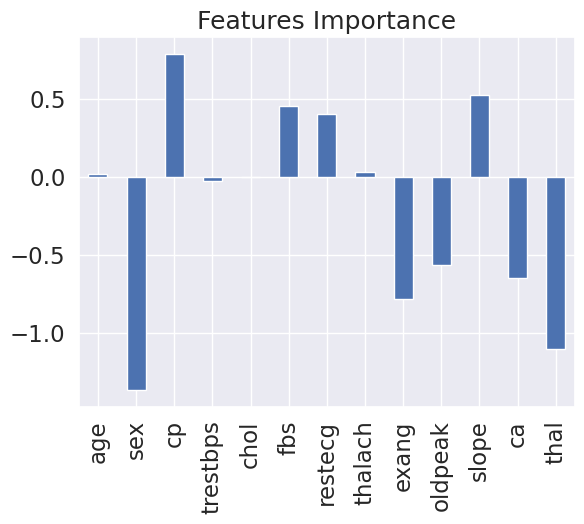

In [ ]:
features = pd.DataFrame(final_coef,index=[0])
features.T.plot.bar(title='Features Importance', legend=False);